In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Jouke\Documents\evedata-logger\output\market_data_with_names_merged.csv', parse_dates=['date'])

In [3]:
# 2. Compute average daily volume per item
daily_volume = df.groupby(['type_id', 'date'])['volume'].sum().reset_index()
avg_daily_volume = daily_volume.groupby('type_id')['volume'].mean().reset_index()
avg_daily_volume.columns = ['type_id', 'avg_daily_volume']

In [4]:
# 3. Compute average spread per item (highest - lowest price per day)
df['spread'] = df['highest'] - df['lowest']
avg_spread = df.groupby('type_id')['spread'].mean().reset_index()
avg_spread.columns = ['type_id', 'avg_bid_ask_spread']

In [5]:
# 4. Add log10 columns
avg_daily_volume['log10_avg_daily_volume'] = np.log10(avg_daily_volume['avg_daily_volume'] + 1e-6)
avg_spread['log10_avg_bid_ask_spread'] = np.log10(avg_spread['avg_bid_ask_spread'] + 1e-6)

In [6]:
# 5. Add item names for clarity
item_names = df[['type_id', 'type_name']].drop_duplicates()

In [7]:
# 6. Merge all data into a final liquidity table
liquidity = avg_daily_volume.merge(avg_spread, on='type_id', how='left')
liquidity = liquidity.merge(item_names, on='type_id', how='left')
liquidity = liquidity[['type_id', 'type_name', 'avg_daily_volume', 'log10_avg_daily_volume',
                       'avg_bid_ask_spread', 'log10_avg_bid_ask_spread']]
liquidity = liquidity.sort_values('avg_daily_volume', ascending=False).reset_index(drop=True)

In [8]:
# 7. Show the top 10 most liquid items
display(liquidity.head(10))

,type_id,type_name,avg_daily_volume,log10_avg_daily_volume,avg_bid_ask_spread,log10_avg_bid_ask_spread
0,34,Tritanium,5.263983e+09,9.721314,0.114986,-0.939350
1,35,Pyerite,2.737269e+09,9.437318,0.964164,-0.015848
2,62516,Compressed Veldspar,8.341709e+08,8.921255,0.647890,-0.188498
3,62517,Compressed Concentrated Veldspar,6.884992e+08,8.837903,0.712712,-0.147085
4,36,Mexallon,6.420486e+08,8.807568,3.635945,0.560617
5,62518,Compressed Dense Veldspar,3.670324e+08,8.564704,0.592411,-0.227376
6,62520,Compressed Scordite,2.999137e+08,8.476996,1.704164,0.231512
7,62521,Compressed Condensed Scordite,2.559797e+08,8.408206,1.863616,0.270357
8,37,Isogen,2.357809e+08,8.372509,12.230959,1.087461
9,62528,Compressed Plagioclase,1.353530e+08,8.131468,2.500740,0.398069


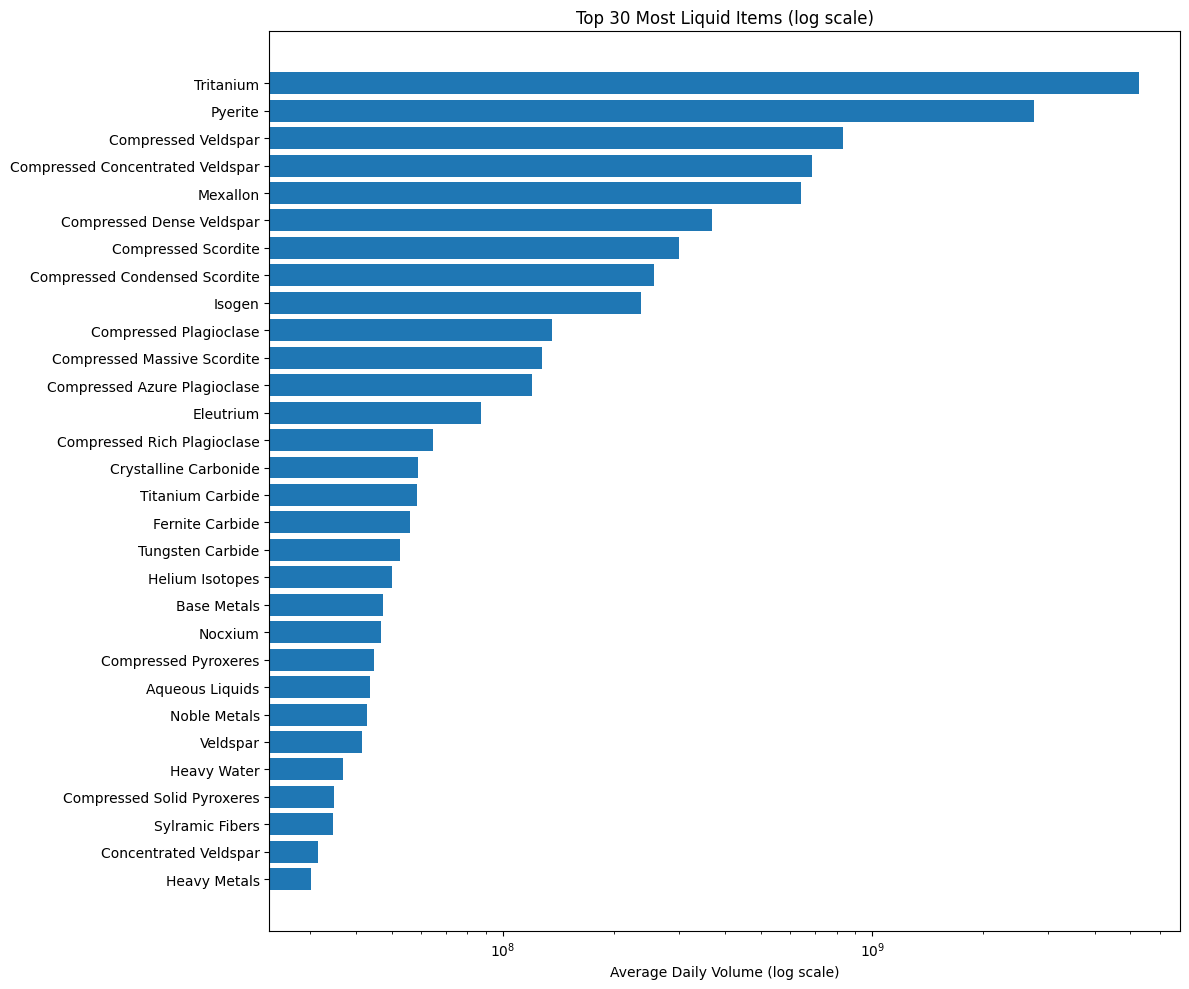

In [9]:
# 8. Plot top 30 most liquid items with log x-axis
top_n = 30
plot_data = liquidity.head(top_n)

plt.figure(figsize=(12, 10))
plt.barh(plot_data['type_name'], plot_data['avg_daily_volume'])
plt.xscale('log')
plt.xlabel('Average Daily Volume (log scale)')
plt.title(f'Top {top_n} Most Liquid Items (log scale)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()